Use optimisation techniques as a way to input a desired final concentration and output an initial concentration, as a opposed to iteratively rerunning code to get a solution

## Set Up

Essentially, trying to find a root of a function such that

$$
f(C_0) = \text{euler method}(C_0) - C_{desired} = 0
$$

We want to find the root, $C_0$, such that the function, $f(C_0)$, is equal to zero.

Can use the scipy module and its root solvers to do this


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from scipy.optimize import fsolve
import functions as f
import time

In [2]:
Nt_gaps = 10000    # number of timesteps
T = 60             # final time 

Nx_spaces = 1000;   # number of spaces in x
L1 = -10; # Distance behind 0 reference point
L2 = 25 # Distance in front  0 reference point

In [27]:
def run_forward_euler(C0):
    # Hard code the parameters here (just testing out the method) 
    Nt_gaps = 10000    # number of timesteps
    T = 60             # final time 

    Nx_spaces = 100;   # number of spaces in x
    L1 = -10; # Distance behind 0 reference point
    L2 = 25 # Distance in front  0 reference point
    
    Cf, _, _ = f.forward_euler(Nt_gaps, Nx_spaces, L1, L2, C0)
    return Cf

In [28]:
def objective_function(C0, C_desired):
    return run_forward_euler(C0) - C_desired

In [29]:
C0 = 1e-2 # Initial guess for C0
C_desired = 1e-3 # Desired final concentration

Set parameters for the optimisation

In [30]:
tol = 1e-8  
maxits = 100

## Using the fsolve method 

In [45]:
t0 = time.time()
C0_optimised, info, ier, msg = fsolve(
    objective_function, 
    C0, 
    args = (C_desired,), 
    xtol = tol,
    full_output = True,  # Get iteration details
    maxfev = maxits  
)
t1 = time.time()

Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017


In [47]:
print(msg)
print(f'Convegerd in {info['nfev']} iterations')
print(f'Optimisation took {round(t1-t0, 4)} s')

The solution converged.
Convegerd in 8 iterations
Optimisation took 1.1036 s


In [48]:
C0_optimised[0]

0.008434529880077911

### Using the root method

In [34]:
from scipy.optimize import root

In [40]:
t0 = time.time()
answer = root(
    objective_function, 
    C0, 
    args = (C_desired),
    method='hybr', #This is the default method for scipy.optimize.root
    options={'xtol': tol, 'maxfev': maxits})
t1 = time.time()

Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017
Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017


In [57]:
answer

C0_optimised_root = answer['x'][0]

In [58]:
print(answer['message'])
print(f'Optimised C0 = {C0_optimised_root}')
print(f'Convegerd in {answer['nfev']} iterations')
print(f'Optimisation took {round(t1-t0, 4)} s')

The solution converged.
Optimised C0 = 0.008434529880077911
Convegerd in 8 iterations
Optimisation took 1.1036 s


### Comparing the two methods (they are the same)

In [64]:
C0_optimised[0] - C0_optimised_root

0.0

### Verify our Method (Plug the $C_0$ optimisation result back into the solver and plot)

In [61]:
Nt_gaps = 10000    # number of timesteps
T = 60             # final time 

Nx_spaces = 100;   # number of spaces in x
L1 = -10; # Distance behind 0 reference point
L2 = 25 # Distance in front  0 reference point

Cf, U, x = f.forward_euler(Nt_gaps, Nx_spaces, L1, L2, C0_optimised_root)

Delta x = 0.35
Delta t = 0.006
C = 0.0049
A = 0.0017


In [63]:
print(f'C0 = {C0_optimised_root}, Cf = {Cf}')

C0 = 0.008434529880077911, Cf = 0.0010000000000000007


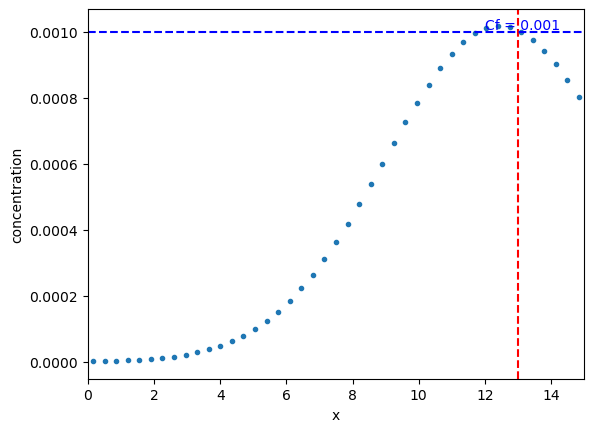

In [66]:
fig, ax = plt.subplots()

f.concentration_x_plot(x, U[:,-1], '', ax)

plt.show()

### Takeaways

Since our objective function is quite simple (aside from the euler method itself), the optimisation itself does not take a long time. The limitation is how fast the euler method is. In the other investigations, we saw the the matrix implementation of Forward Euler was significantly faster than Backwards Euler in this regard.